In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install sodapy

from sodapy import Socrata

!pip install seaborn

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Query the data**

Data source - https://data.cityofnewyork.us/City-Government/Property-Valuation-and-Assessment-Data/yjxr-fw8i

Data is queried using the city of new york property valuation website API.

In [ ]:
#connect to the api and downlaod data
client = Socrata('data.cityofnewyork.us', None)

#query data
num_of_rows = 50000
results = client.get("yjxr-fw8i", limit=num_of_rows)

#create a dataframe
df = pd.DataFrame(results)

#check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   bble                         50000 non-null  object
 1   boro                         50000 non-null  object
 2   block                        50000 non-null  object
 3   lot                          50000 non-null  object
 4   owner                        47437 non-null  object
 5   bldgcl                       50000 non-null  object
 6   taxclass                     50000 non-null  object
 7   ltfront                      50000 non-null  object
 8   ltdepth                      50000 non-null  object
 9   stories                      20040 non-null  object
 10  fullval                      50000 non-null  object
 11  avland                       50000 non-null  object
 12  avtot                        50000 non-null  object
 13  exland                       50

# **Data Cleaning**

In the following section, we will create a new dataframe. The new dataframe will contain the following columns. 

boro - Contains 5 classes. (1 - Manhattan, 2 - Bronx, 3 - Brooklyn, 4 - Queens, 5 - Staten Island) 

taxclass - Contains 10 tax classes (1, 1A, 1B, 1C, 2, 2A, 2B, 2C, 3, 4)

ltfront - Lot width

ltdepth - Lot Depth

fullval - Market value

year - Assessment year

In [ ]:
#select only the interested columns from the original dataframe
df2 = df[['ltfront', 'ltdepth', 'fullval', 'year', 'taxclass', 'boro']]
#check info 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ltfront   50000 non-null  object
 1   ltdepth   50000 non-null  object
 2   fullval   50000 non-null  object
 3   year      50000 non-null  object
 4   taxclass  50000 non-null  object
 5   boro      50000 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


**Change data types**

In [ ]:
#get a new copy of the dataframe
df_final = df2

#change to numerical data
df_final['ltfront'] = pd.to_numeric(df2['ltfront'])
df_final['ltdepth'] = pd.to_numeric(df2['ltdepth'])
df_final['fullval'] = pd.to_numeric(df2['fullval'])

#change categorical classes
df_final['taxclass'] = df2['taxclass'].astype('category')
df_final['boro'] = df2['boro'].astype('category')

#change year
def change_year(x):
  year = x.split('/')[0]
  return int(year)

#change year to correct format
# df_final['year'] = df2['year'].apply(change_year)
df_final['year'] = df_final['year'].apply(change_year)

#df info
df_final.describe()

,ltfront,ltdepth,fullval,year
count,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,44.469160,84.946700,1.406343e+06,2015.423540
std,139.746089,156.958644,2.041217e+07,2.808008
min,0.000000,0.000000,0.000000e+00,2010.000000
25%,0.000000,0.000000,3.900000e+04,2013.000000
50%,20.000000,75.000000,1.790270e+05,2016.000000
75%,40.000000,100.000000,4.102480e+05,2018.000000
max,8821.000000,5000.000000,3.498547e+09,2018.000000


In [ ]:
#some full values are zeros so lets get rid of them
df_final = df_final[df_final['fullval'] > 10000].reset_index(drop = True)
# df_final = df_final[df_final['ltfront'] != 0].reset_index(drop = True)
# df_final = df_final[df_final['ltdepth'] != 0].reset_index(drop = True)

In [ ]:
df_final.describe()

,ltfront,ltdepth,fullval,year
count,39321.000000,39321.000000,3.932100e+04,39321.000000
mean,40.569874,74.057984,1.787816e+06,2015.696422
std,134.763047,124.047969,2.300295e+07,2.796685
min,0.000000,0.000000,1.007000e+04,2010.000000
25%,0.000000,0.000000,1.320000e+05,2013.000000
50%,20.000000,76.000000,2.467010e+05,2017.000000
75%,40.000000,100.000000,5.100000e+05,2018.000000
max,8821.000000,4720.000000,3.498547e+09,2018.000000


Run cells the cell below to change combine tax classes and make '1', '2', '3', '4' as tax calsses

In [ ]:
# #making sure the borough classes are equally balanced
# data1 = df_final[df_final['boro'] == '1'][:5000].reset_index(drop = True)
# data2 = df_final[df_final['boro'] == '2'][:5000].reset_index(drop = True)
# data3 = df_final[df_final['boro'] == '3'][:5000].reset_index(drop = True)
# data4 = df_final[df_final['boro'] == '4'][:5000].reset_index(drop = True)
# data5 = df_final[df_final['boro'] == '5'].reset_index(drop = True)

# df_new = pd.concat([data1, data2, data3, data4, data5], axis = 0)
# df_new = df_new.sample(frac = 1).reset_index(drop = True)

# df_final = df_new

def change_tc(x):
  if (x == '1A') or (x == '1B') or (x == '1C'):
    x = '1'
  elif (x == '2A') or (x == '2B') or (x == '2C'):
    x = '2'

  return x

df_final['taxclass'] = df_final['taxclass'].apply(change_tc)
df_final['taxclass'] = df_final['taxclass'].astype('category')

In [ ]:
df_final['taxclass'].value_counts()

1    15813
2    15137
4     8355
3       16
Name: taxclass, dtype: int64

# **Exploratory Data Analysis**

The next section is used to visualize data. 

**Categorical Data**

Text(0.5, 1.0, 'Borough Class Frequency')

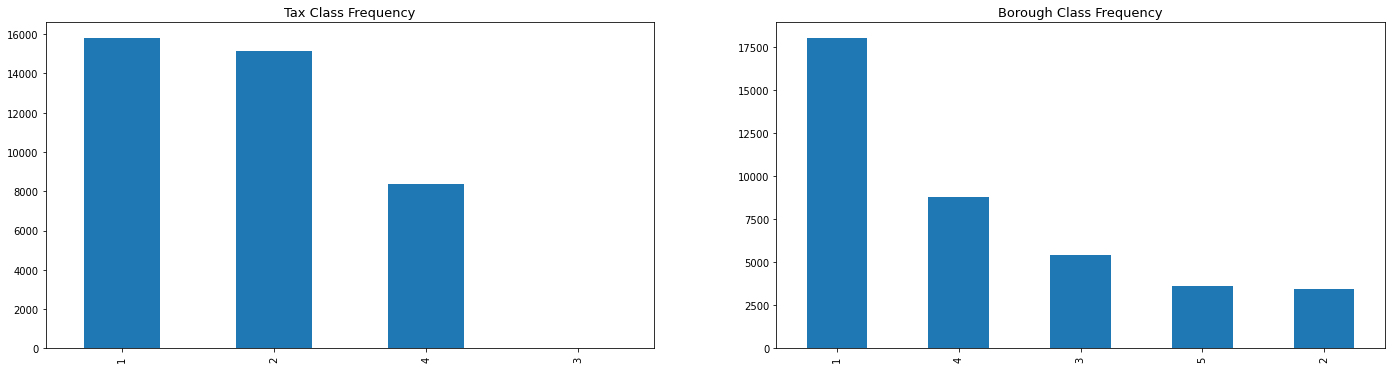

In [ ]:
#plot categorical data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (24, 6))
df_final['taxclass'].value_counts().plot(kind = 'bar',  ax = axes[0], x = 'tax class')
axes[0].set_title('Tax Class Frequency', fontsize = 13)

df_final['boro'].value_counts().plot(kind = 'bar',  ax = axes[1])
axes[1].set_title('Borough Class Frequency', fontsize = 13)

**Numerical Data**

Plot a correlation heatmap to see the relationships between each column.

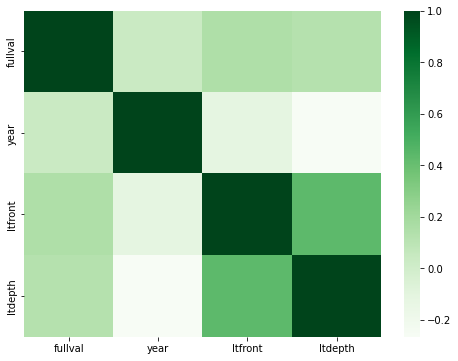

In [ ]:
#get the numerical data
numerical_data = ['fullval', 'year', 'ltfront', 'ltdepth']

#get the correlation matrix
corr_mat = df_final[numerical_data].corr()

#plot the heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr_mat, cmap = 'Greens')

Pair plot to see data distributions.

<Figure size 720x720 with 0 Axes>

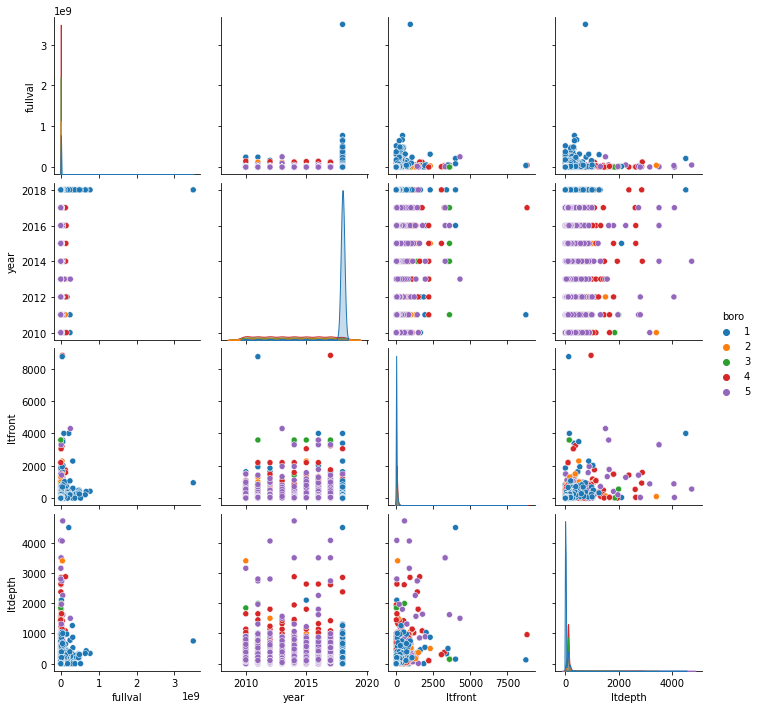

In [ ]:
#pairplot with hue boro
plt.figure(figsize = (10, 10))
sns.pairplot(data = df_final, vars = numerical_data, hue = 'boro')

<Figure size 720x720 with 0 Axes>

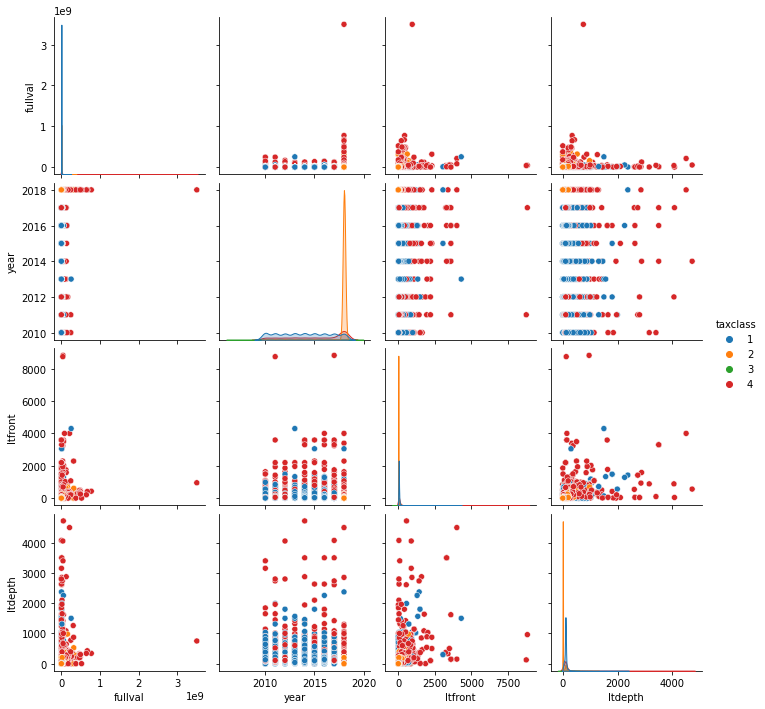

In [ ]:
plt.figure(figsize = (10, 10))
sns.pairplot(data = df_final, vars = numerical_data, hue = 'taxclass')

**More data visualization**

First visualize the mean market value (fullval) in each borough with respect to time. 

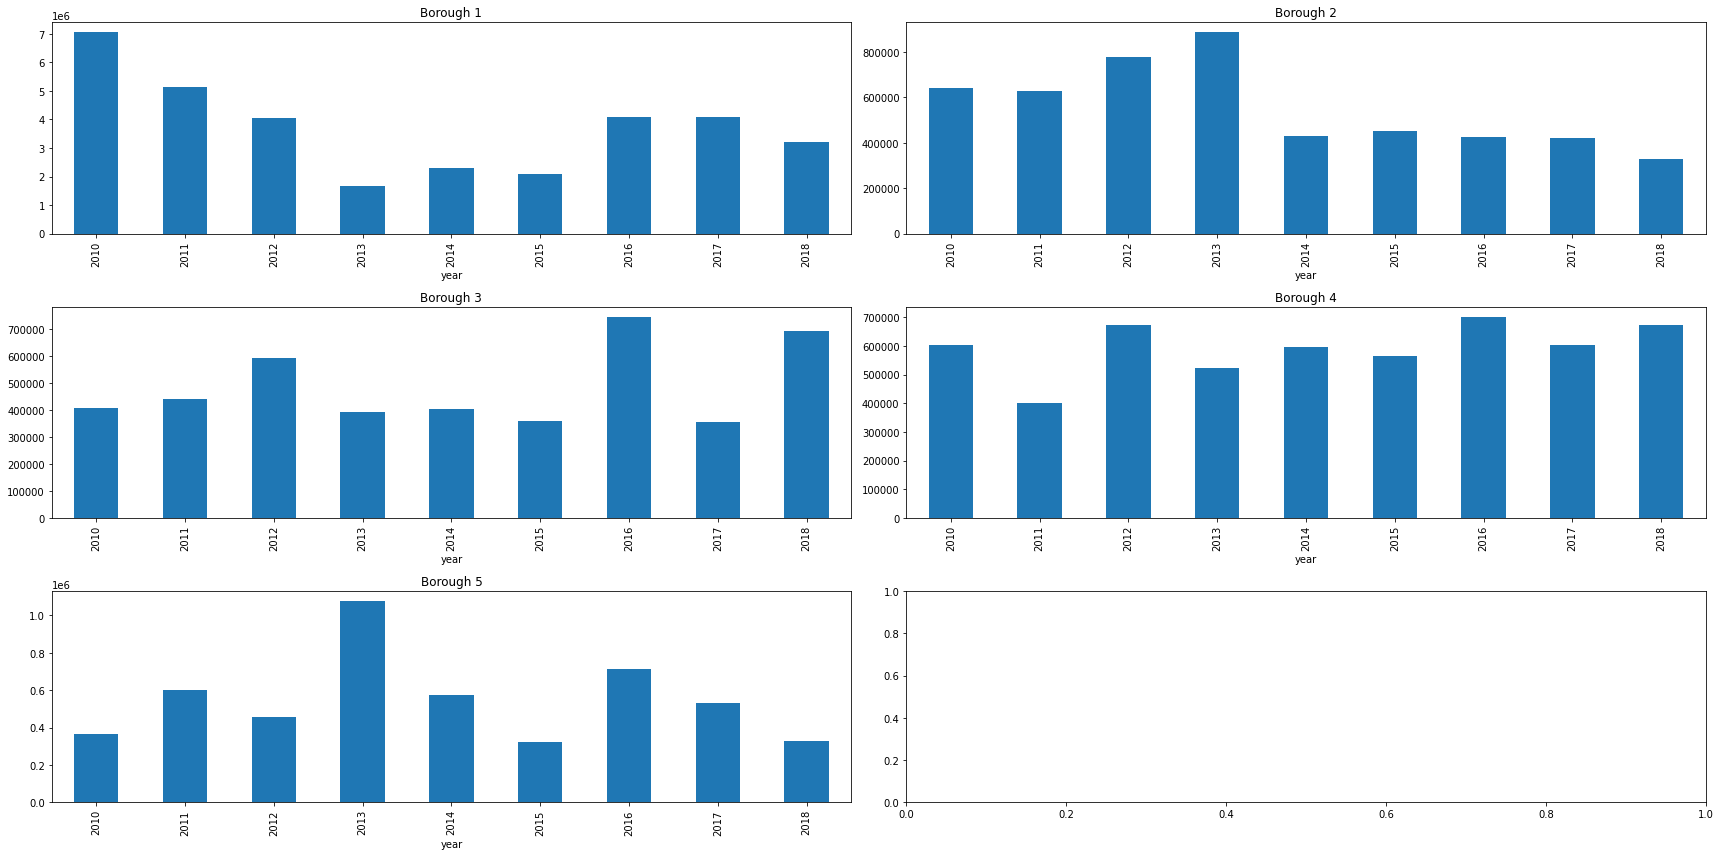

In [ ]:
#create figures for each borough vs full value
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (24, 12))

df_final[df_final['boro'] == '1'].groupby(['year'])['fullval'].mean().plot(kind = 'bar', title = 'Borough 1', ax = axes[0, 0])

df_final[df_final['boro'] == '2'].groupby(['year'])['fullval'].mean().plot(kind = 'bar', title = 'Borough 2', ax = axes[0, 1])

df_final[df_final['boro'] == '3'].groupby(['year'])['fullval'].mean().plot(kind = 'bar', title = 'Borough 3', ax = axes[1, 0])

df_final[df_final['boro'] == '4'].groupby(['year'])['fullval'].mean().plot(kind = 'bar', title = 'Borough 4', ax = axes[1, 1])

df_final[df_final['boro'] == '5'].groupby(['year'])['fullval'].mean().plot(kind = 'bar', title = 'Borough 5', ax = axes[2, 0])

fig.tight_layout()
plt.show()

Do the same now with "ltfront" and "ltdepth"

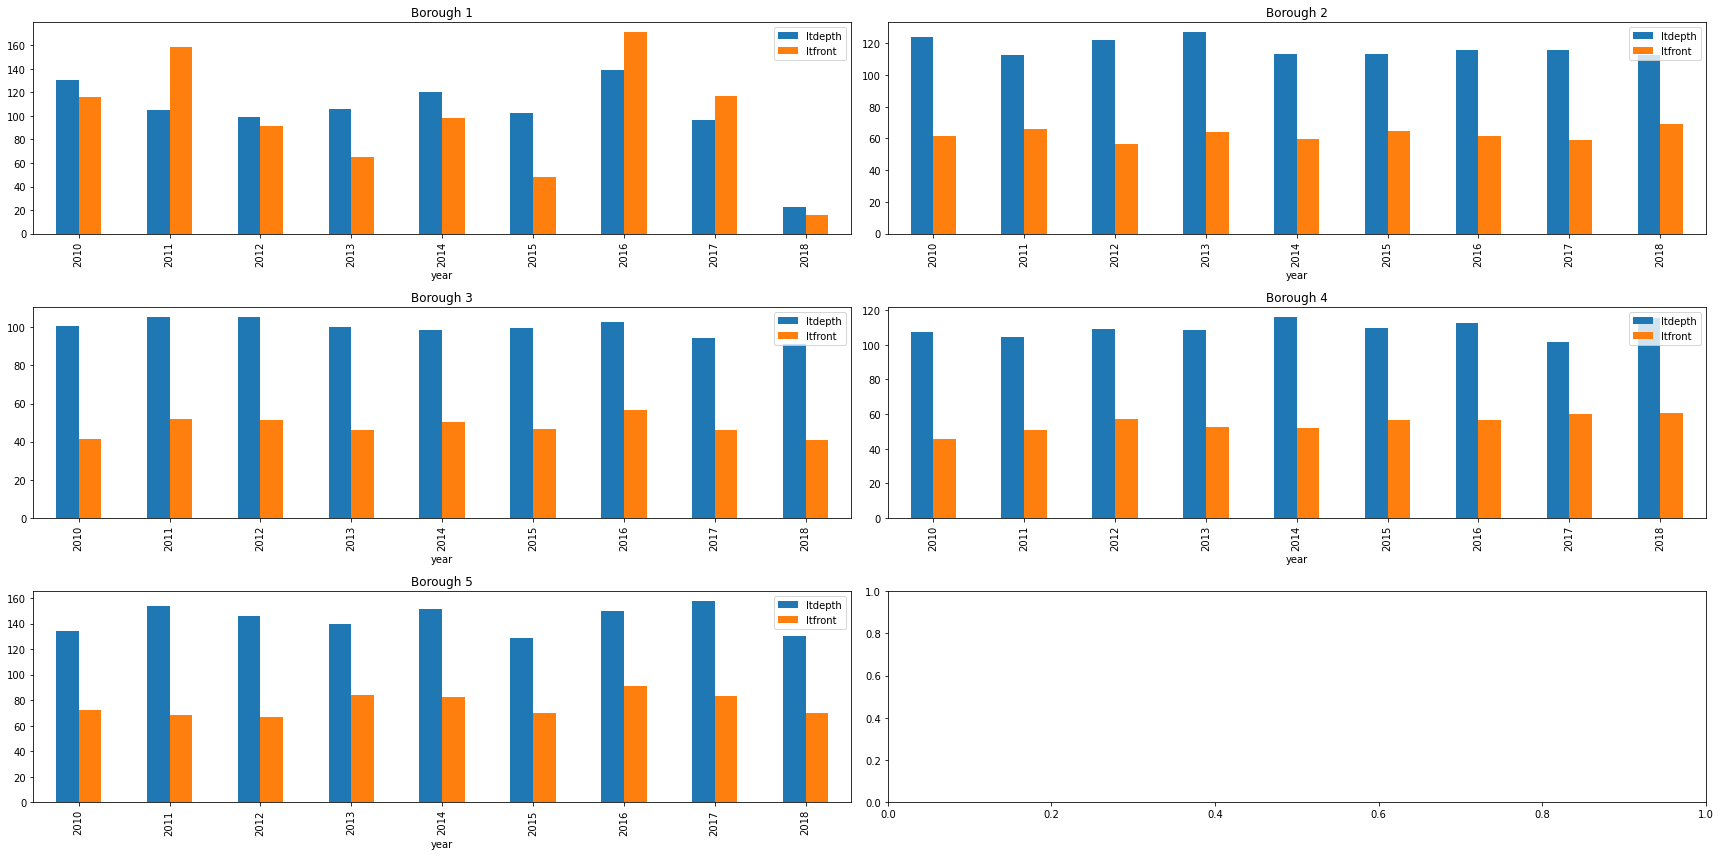

In [ ]:
#create figures for each borough vs ltdepth and lt
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (24, 12))

df_final[df_final['boro'] == '1'].groupby(['year'])['ltdepth', 'ltfront'].mean().plot(kind = 'bar', title = 'Borough 1', ax = axes[0, 0])

df_final[df_final['boro'] == '2'].groupby(['year'])['ltdepth', 'ltfront'].mean().plot(kind = 'bar', title = 'Borough 2', ax = axes[0, 1])

df_final[df_final['boro'] == '3'].groupby(['year'])['ltdepth', 'ltfront'].mean().plot(kind = 'bar', title = 'Borough 3', ax = axes[1, 0])

df_final[df_final['boro'] == '4'].groupby(['year'])['ltdepth', 'ltfront'].mean().plot(kind = 'bar', title = 'Borough 4', ax = axes[1, 1])

df_final[df_final['boro'] == '5'].groupby(['year'])['ltdepth', 'ltfront'].mean().plot(kind = 'bar', title = 'Borough 5', ax = axes[2, 0])

fig.tight_layout()
plt.show()

**Further analysis**

Checking how the mean market value is changing over time based on tax class for each borough.

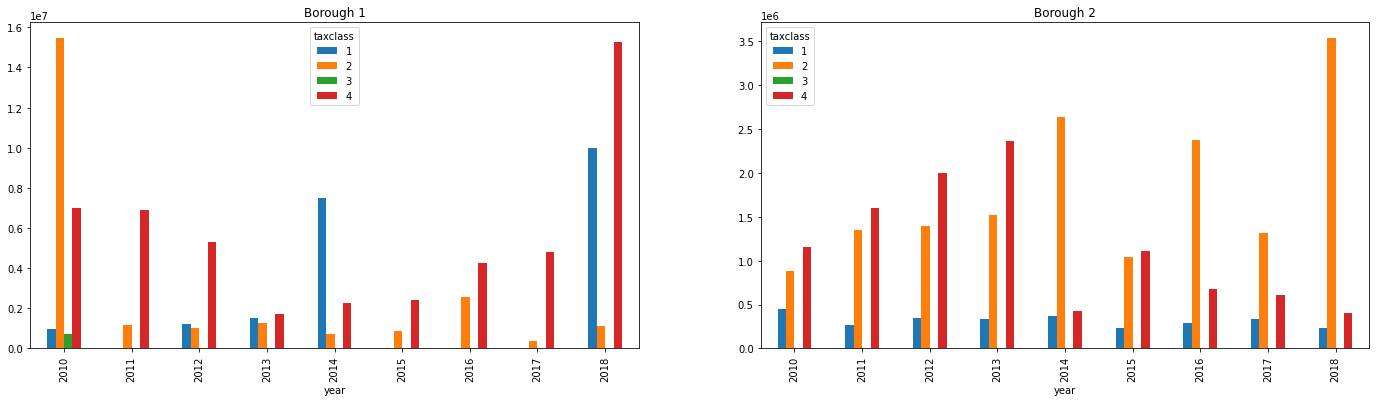

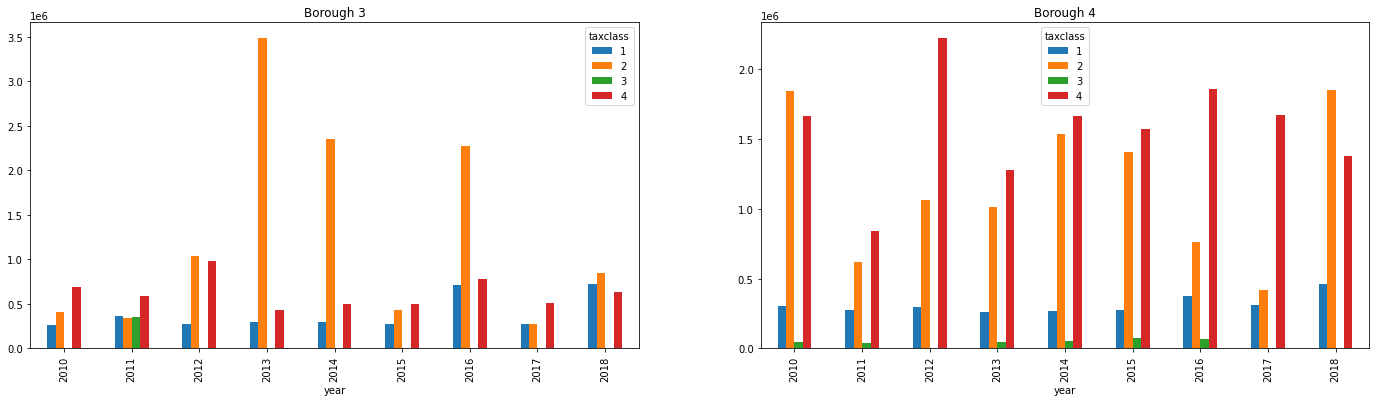

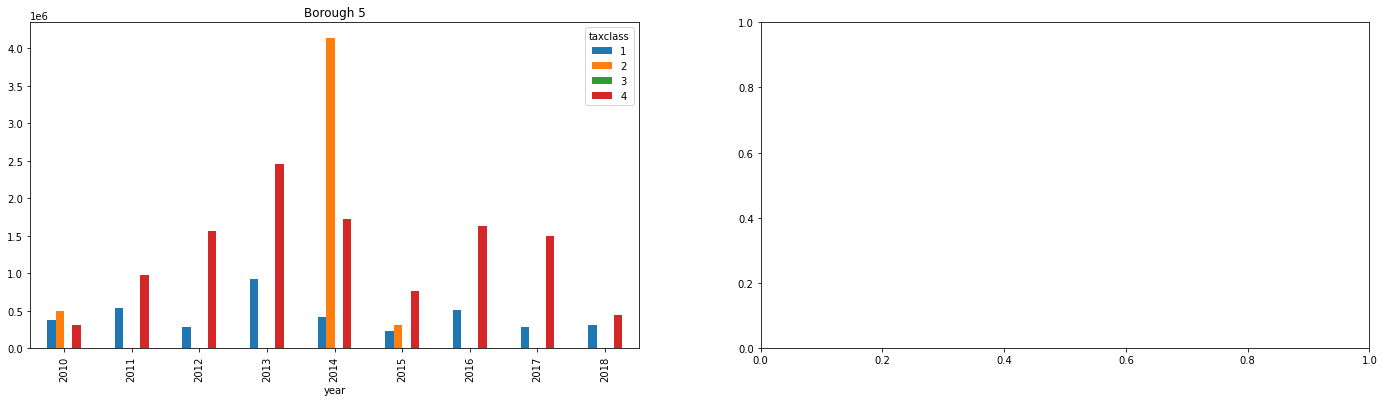

In [ ]:
#borough 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (24, 6))
data = df_final[df_final['boro'] == '1'].groupby(['year', 'taxclass'])['fullval'].mean().unstack()
data.plot(kind = 'bar', ax = axes[0], title = 'Borough 1')

#borough 2
data = df_final[df_final['boro'] == '2'].groupby(['year', 'taxclass'])['fullval'].mean().unstack()
data.plot(kind = 'bar', ax = axes[1], title = 'Borough 2')
plt.show()

#borough 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (24, 6))
data = df_final[df_final['boro'] == '3'].groupby(['year', 'taxclass'])['fullval'].mean().unstack()
data.plot(kind = 'bar', ax = axes[0], title = 'Borough 3')

#borough 4
data = df_final[df_final['boro'] == '4'].groupby(['year', 'taxclass'])['fullval'].mean().unstack()
data.plot(kind = 'bar', ax = axes[1], title = 'Borough 4')
plt.show()

#borough 5
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (24, 6))
data = df_final[df_final['boro'] == '5'].groupby(['year', 'taxclass'])['fullval'].mean().unstack()
data.plot(kind = 'bar', ax = axes[0], title = 'Borough 5')

# **Classification**

Next we will try to classify the borough using a KNN model.



In [ ]:
#import libraries
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Model 1


For the first model we will only use the "fullval" and "taxclass" to predict the borough. 

(0.0, 353000000.0)

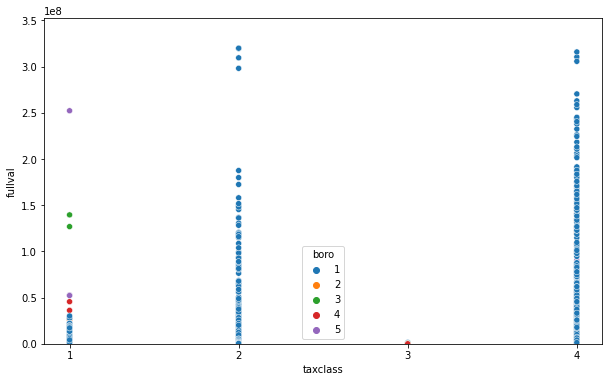

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_final, x = 'taxclass', y = 'fullval', hue = 'boro')
plt.ylim([0, 3.53e8])

In [ ]:
#encode taxclasses
le = preprocessing.LabelEncoder()
tax_encoded = le.fit_transform(df_final['taxclass'])

#encode borough
borough_encoded = le.fit_transform(df_final['boro'])

#convert full value to numpy
full_value = df_final['fullval'].to_numpy()

#create features
features = list(zip(tax_encoded, full_value))

In [ ]:
#test different K values
k_vals = [1, 3, 5, 9, 13, 19, 27, 39, 49]

acc_dict = {}

for k in k_vals:
  #create model and fit transform
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(features, borough_encoded)

  #predictions
  preds = model.predict(features)

  #calculate accuracy
  acc = accuracy_score(borough_encoded, preds)

  acc_dict[k] = acc


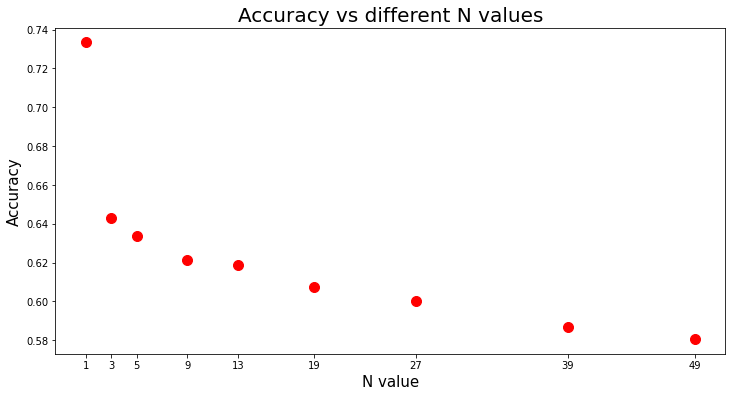

In [ ]:
#plot
plt.figure(figsize = (12, 6))
plt.scatter(acc_dict.keys(), acc_dict.values(), s = 100, color = 'r')
plt.ylabel('Accuracy', fontsize = '15')
plt.xlabel('N value', fontsize = '15')
plt.title('Accuracy vs different N values', fontsize = '20')
plt.xticks(list(acc_dict.keys()), list(acc_dict.keys()))
plt.show()

Create train/test sets and see if the model works for out of sample data

In [ ]:
#create train test split
x_train, x_test, y_train, y_test = train_test_split(features, borough_encoded, test_size = 0.1, random_state = 1)

#print out shapes
print(f'Number of train samples {len(x_train)}')
print(f'Number of test samples {len(x_test)}')


Number of train samples 35388
Number of test samples 3933


In [ ]:
#create model and fit transform
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)

#predictions
preds_train = model.predict(x_train)

#calculate accuracy
acc_train = accuracy_score(y_train, preds_train)

#print
print(f'Training accuracy is: {acc_train}')

#testing accuracy
preds_test = model.predict(x_test)
acc_test = accuracy_score(y_test, preds_test)

#print
print(f'Testing accuracy is: {acc_test}')

Training accuracy is: 0.7484740590030519
Testing accuracy is: 0.5619120264429189


In [ ]:
#correct predictions based on each class
correct_dict = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

instances_dict = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

for i, val in enumerate(y_test):
  instances_dict[val] += 1

  if val == preds_test[i]:
    correct_dict[val] += 1
    
  

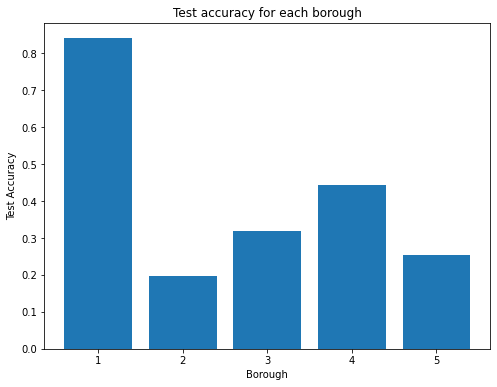

In [ ]:
#accuracies for each class
acc_each_class = np.array(list(correct_dict.values()))/np.array(list(instances_dict.values()))
ticks = [0, 1, 2, 3, 4]
xticknames = ['1', '2', '3', '4', '5']
plt.figure(figsize = (8, 6))
plt.bar(np.arange(0, 5), acc_each_class)
plt.xticks(ticks, xticknames)
plt.xlabel('Borough')
plt.ylabel('Test Accuracy')
plt.title('Test accuracy for each borough')
plt.show()

## Model 2

In this model, we will use "fullval, taxclass, year, ltfront, ltdepth" to predict the "boro"

In [ ]:
#encode taxclasses
le = preprocessing.LabelEncoder()
tax_encoded = le.fit_transform(df_final['taxclass'])

#encode borough
borough_encoded = le.fit_transform(df_final['boro'])

#convert full value to numpy
full_value = df_final['fullval'].to_numpy()

#convert year to numpy
year = df_final['year'].to_numpy()

#convert lot depth to numpy
lot_depth = df_final['ltdepth'].to_numpy()

#convert lot front to numpy
lot_front = df_final['ltfront'].to_numpy()

#create features
features = list(zip(tax_encoded, full_value, year, lot_depth, lot_front))

In [ ]:
#test different K values
k_vals = [1, 3, 5, 9, 13, 19, 27, 39, 49]

acc_dict = {}

for k in k_vals:
  #create model and fit transform
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(features, borough_encoded)

  #predictions
  preds = model.predict(features)

  #calculate accuracy
  acc = accuracy_score(borough_encoded, preds)

  acc_dict[k] = acc

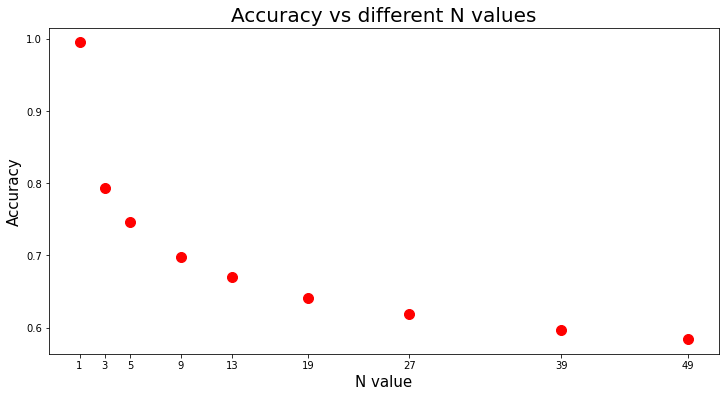

In [ ]:
#plot
plt.figure(figsize = (12, 6))
plt.scatter(acc_dict.keys(), acc_dict.values(), s = 100, color = 'r')
plt.ylabel('Accuracy', fontsize = '15')
plt.xlabel('N value', fontsize = '15')
plt.title('Accuracy vs different N values', fontsize = '20')
plt.xticks(list(acc_dict.keys()), list(acc_dict.keys()))
plt.show()

In [ ]:
#create train test split
x_train, x_test, y_train, y_test = train_test_split(features, borough_encoded, test_size = 0.1, random_state = 1)

#print out shapes
print(f'Number of train samples {len(x_train)}')
print(f'Number of test samples {len(x_test)}')

Number of train samples 35388
Number of test samples 3933


In [ ]:
#create model and fit transform
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)

#predictions
preds_train = model.predict(x_train)

#calculate accuracy
acc_train = accuracy_score(y_train, preds_train)

#print
print(f'Training accuracy is: {acc_train}')

#testing accuracy
preds_test = model.predict(x_test)
acc_test = accuracy_score(y_test, preds_test)

#print
print(f'Testing accuracy is: {acc_test}')

Training accuracy is: 0.9967785690064429
Testing accuracy is: 0.65395372489194


In [ ]:
#correct predictions based on each class
correct_dict = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

instances_dict = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

for i, val in enumerate(y_test):
  instances_dict[val] += 1

  if val == preds_test[i]:
    correct_dict[val] += 1

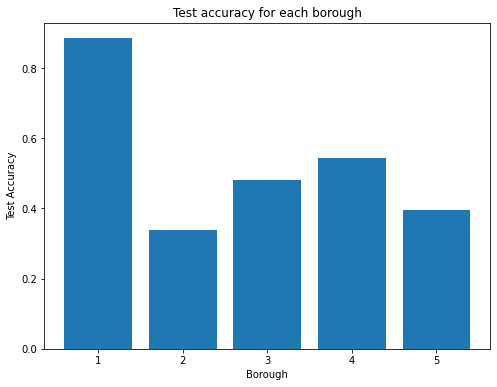

In [ ]:
#accuracies for each class
acc_each_class = np.array(list(correct_dict.values()))/np.array(list(instances_dict.values()))
ticks = [0, 1, 2, 3, 4]
xticknames = ['1', '2', '3', '4', '5']
plt.figure(figsize = (8, 6))
plt.bar(np.arange(0, 5), acc_each_class)
plt.xlabel('Borough')
plt.ylabel('Test Accuracy')
plt.xticks(ticks, xticknames)
plt.title('Test accuracy for each borough')
plt.show()

# **Regression**

Now we will create a regression model to predict the "full value" of the property using inputs "year, borough, ltfront, ltdepth, taxclass"

In [ ]:
#import sklearn model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [ ]:
#encode taxclasses
le = preprocessing.LabelEncoder()
tax_encoded = le.fit_transform(df_final['taxclass'])

#encode borough
borough_encoded = le.fit_transform(df_final['boro'])

#convert full value to numpy
full_value = df_final['fullval'].to_numpy()

#convert year to numpy
year = df_final['year'].to_numpy()

#convert lot depth to numpy
lot_depth = df_final['ltdepth'].to_numpy()

#convert lot front to numpy
lot_front = df_final['ltfront'].to_numpy()

#create features
features = list(zip(tax_encoded, borough_encoded, year, lot_depth, lot_front))

In [ ]:
#create train test split
x_train, x_test, y_train, y_test = train_test_split(features, full_value, test_size = 0.1, random_state = 1)

#print out shapes
print(f'Number of train samples {len(x_train)}')
print(f'Number of test samples {len(x_test)}')

Number of train samples 35388
Number of test samples 3933


In [ ]:
#create model and fit transform
model = LinearRegression()
model.fit(x_train, y_train)

#predictions
preds_train = model.predict(x_train)

#calculate accuracy
train_score = model.score(x_train, y_train)

#print
print(f'Training score is: {train_score}')

#testing accuracy
preds_test = model.predict(x_test)
test_score = model.score(x_test, y_test)

#print
print(f'Testing score is: {test_score}')

Training score is: 0.0365223095877063
Testing score is: 0.03595533541808893


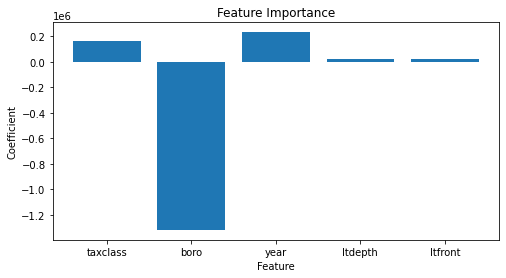

In [ ]:
vals = model.coef_
feats = ['taxclass', 'boro', 'year', 'ltdepth', 'ltfront']

plt.figure(figsize = (8, 4))
plt.bar(feats, vals)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

Regression with regularization

In [ ]:
#create model and fit transform
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)

#predictions
preds_train = lasso.predict(x_train)

#calculate accuracy
train_score = lasso.score(x_train, y_train)

#print
print(f'Training score is: {train_score}')

#testing accuracy
preds_test = lasso.predict(x_test)
test_score = lasso.score(x_test, y_test)

#print
print(f'Testing score is: {test_score}')

Training score is: 0.036522309587704416
Testing score is: 0.035955338326702724


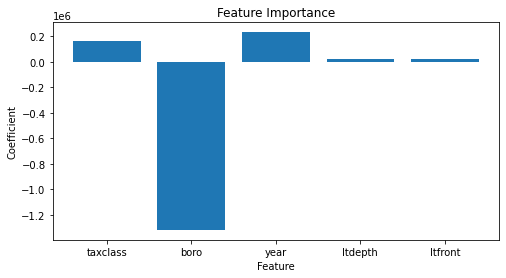

In [ ]:
vals = model.coef_
feats = ['taxclass', 'boro', 'year', 'ltdepth', 'ltfront']

plt.figure(figsize = (8, 4))
plt.bar(feats, vals)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()
